Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Quadro K620 (CNMeM is disabled, cuDNN not available)


(500, 20, 20) (500, 20, 20) (500, 20, 20)


{}

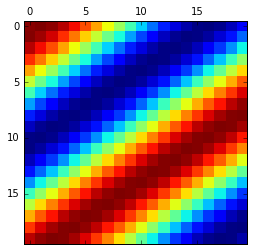

In [1]:
%pylab inline
import convis
import stimulus

the_input = np.zeros((500,20,20))
T,X,Y = np.meshgrid(np.linspace(0.0,10.0,the_input.shape[0]),np.linspace(-1.0,1.0,the_input.shape[1]),np.linspace(-1.0,1.0,the_input.shape[2]), indexing='ij')
print T.shape,X.shape,Y.shape
the_input += np.sin(T+3.0*X+2.0*Y) #+ np.sin(T+9.0*X+6.0*Y) 
the_input[250:] += 0.5
the_input = 255.0*(the_input+2.0)/4.0
matshow(the_input[5])
convis.describe(the_input)

In [2]:
conf1 = convis.retina.RetinaConfiguration()
conf1.set('contrast-gain-control.adaptation-feedback-amplification__Hz',100)
m1 = convis.retina.Retina(conf1,ganglion_spikes=False)
m1.create_function()

conf2 = convis.retina.RetinaConfiguration()
conf2.set('contrast-gain-control.adaptation-feedback-amplification__Hz',100)
m2 = convis.retina.Retina(conf2,ganglion_spikes=False)
goal_input = convis.as_input(convis.theano.tensor.dtensor3(),name='goal')
error_term = ((m2.ganglion_input_layers[0].graph-goal_input)**2)[50:,:,:]
m2.add_output(error_term,name='error_term')
m2.create_function(additional_inputs=[goal_input])

In [3]:
# default values:
#m1.parameters.GanglionInputLayer_Parvocellular_On.N.i_0_G = 37.0
#m1.parameters.GanglionInputLayer_Parvocellular_On.N.lambda_G = 100.0
#m1.parameters.GanglionInputLayer_Parvocellular_On.N.v_0_G = 0.0

m1.clear_states()
o_fit = m1.run(the_input)
o_goal = o_fit[0]

data = {}

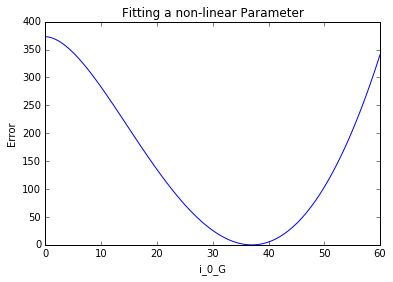

In [4]:
m2.parameters.GanglionInputLayer_Parvocellular_On.N.i_0_G.set_value(37.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.lambda_G.set_value(100.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.v_0_G.set_value(0.0)
errors = []
var = m2.parameters.GanglionInputLayer_Parvocellular_On.N.i_0_G
vs = np.linspace(0.0,60.0,100.0)
for v in vs:
    var.set_value(v)
    m2.clear_states()
    o_fit = m2.run(the_input,additional_inputs=[o_goal])
    errors.append(o_fit[2].mean())
plot(vs,errors)
xlabel(convis.variables.get_convis_attribute(var,'name'))
ylabel('Error')
title('Fitting a non-linear Parameter')
data[convis.variables.get_convis_attribute(var,'name')] = {
    'errors': errors,
    'vs': vs
}

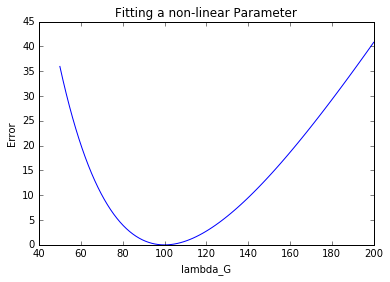

In [5]:
m2.parameters.GanglionInputLayer_Parvocellular_On.N.i_0_G.set_value(37.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.lambda_G.set_value(100.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.v_0_G.set_value(0.0)
errors = []
var = m2.parameters.GanglionInputLayer_Parvocellular_On.N.lambda_G
vs = np.linspace(50.0,200.0,100.0)
for v in vs:
    var.set_value(v)
    m2.clear_states()
    o_fit = m2.run(the_input,additional_inputs=[o_goal])
    errors.append(o_fit[2].mean())
plot(vs,errors)
xlabel(convis.variables.get_convis_attribute(var,'name'))
ylabel('Error')
title('Fitting a non-linear Parameter')
data[convis.variables.get_convis_attribute(var,'name')] = {
    'errors': errors,
    'vs': vs
}

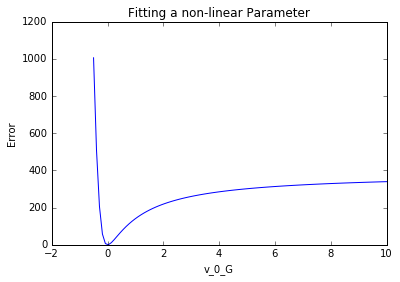

In [6]:
m2.parameters.GanglionInputLayer_Parvocellular_On.N.i_0_G.set_value(37.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.lambda_G.set_value(100.0)
m2.parameters.GanglionInputLayer_Parvocellular_On.N.v_0_G.set_value(0.0)
errors = []
var = m2.parameters.GanglionInputLayer_Parvocellular_On.N.v_0_G
vs = np.linspace(-0.5,10.0,100.0)
for v in vs:
    var.set_value(v)
    m2.clear_states()
    o_fit = m2.run(the_input,additional_inputs=[o_goal])
    errors.append(o_fit[2].mean())
plot(vs,errors)
xlabel(convis.variables.get_convis_attribute(var,'name'))
ylabel('Error')
title('Fitting a non-linear Parameter')
data[convis.variables.get_convis_attribute(var,'name')] = {
    'errors': errors,
    'vs': vs
}

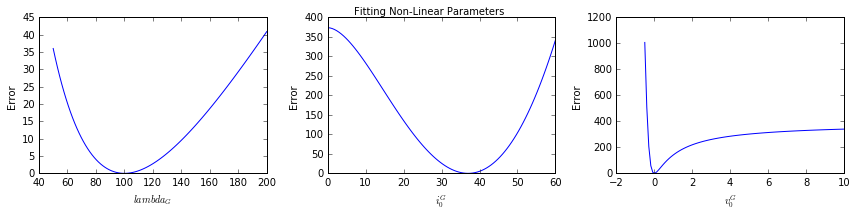

In [19]:
figure(figsize=(12,3))
for i,k in enumerate(data.keys()):
    subplot(1,len(data.keys()),i+1)
    plot(data[k]['vs'],data[k]['errors'])
    ylabel('Error')
    xlabel('$'+k.replace('0_G','0^G')+'$')
suptitle('Fitting Non-Linear Parameters')
tight_layout()